Finding FWHM:
\begin{equation}
   1/2=e^{-kr^2}
\end{equation}

$$r=\sqrt(-\ln(1/2)/k)=\sqrt(\ln(2)/k)$$

Output of the lens is a gaussian that's down 15dB at $r_0=3in$:

$$ 10*log10[e^{-2kr_0^2}]=-15 $$

$$k=297.4178 m^{-2}$$

NOTE: fwhm = w * 2 * np.sqrt(np.log(2))


In [1]:
# No baffles
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy
import math

In [2]:
# returns fraction of power lost and effective waist size for truncated 
# Gaussian with radius of truncation r_t
def gaussian_truncated_power(r_t,w):
    f = math.exp(-r_t**2 / w**2)
    #w_eff = w*(1 - f**.5)
    
    return f#,w_eff

In [3]:
ff = 500*u.GHz
ll = const.c/ff

In [4]:
# effective focal lengths of tertiary, secondary, primary
f_1 = 155 * u.cm
f_2 = 11940 * u.cm
f_3 = 19.2 * u.cm

f_lens = 24 * u.cm

# CST simulation positions (y,z):
lens_top_position = [-84.67,-51.06] * u.cm
tertiary_position = [-84.67,-18] * u.cm
secondary_position = [0.,0.] * u.cm
primary_position = [-98.67,35.89] * u.cm

d_lenslet_lens = 24 * u.cm
d_lens_3 = ((lens_top_position[0]-tertiary_position[0])**2+(lens_top_position[1]-tertiary_position[1])**2)**.5
d_3_2 = ((secondary_position[0]-tertiary_position[0])**2+(secondary_position[1]-tertiary_position[1])**2)**.5
d_2_1 = ((secondary_position[0]-primary_position[0])**2+(secondary_position[1]-primary_position[1])**2)**.5

print("Distances:")
print("\tLenslet-lens: %.3f cm" %d_lenslet_lens.value)
print("\tLens-tertiary: %.3f cm" %d_lens_3.value)
print("\tTertiary-secondary: %.3f cm" %d_3_2.value)
print("\tSecondary-primary: %.3f cm" %d_2_1.value)

# waist at lenslet. From Negar's slides on the lenslet. Output at ~500GHz
# 420GHz: 1.618mm
# 470GHz: 1.616mm
# 480GHz: 1.680mm
# 520GHz: 1.715mm
# 540GHz: 1.708mm
w0_lenslet = 0.17 * u.cm 

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
print("FWHM at lens: %2f cm" %fwhm_.to(u.cm).value)

calc_radius_lens = 2.7*u.cm
aperture_radius = 3.81*u.cm
cold_stop_radius = 4.891*u.cm
cold_stop_radius = aperture_radius

Distances:
	Lenslet-lens: 24.000 cm
	Lens-tertiary: 33.060 cm
	Tertiary-secondary: 86.562 cm
	Secondary-primary: 104.995 cm
FWHM at lens: 4.827577 cm


In [5]:
lens_obj = poppy.QuadraticLens(f_lens)
tertiary_obj = poppy.QuadraticLens(f_3)
secondary_obj = poppy.QuadraticLens(f_2)
primary_obj = poppy.QuadraticLens(f_1)

In [6]:
lenslet_aperture = poppy.GaussianAperture(w=w0_lenslet,pupil_diam=0.2*u.cm)
#lenslet_aperture = poppy.CircularAperture(radius=0.2*u.cm)

## Lenslet-lens system

In [7]:
# Start wavefront from lenslet
wf = poppy.FresnelWavefront(beam_radius=w0_lenslet,wavelength=ll)#,npix=npix)
wf *= lenslet_aperture

# Propagate to lens, after lens stop.
wf.propagate_fresnel(d_lenslet_lens)
wf*=lens_obj

waist_location_post_lens = wf.z_w0-d_lenslet_lens
waist_post_lens = wf.w_0
Confocal_distance_post_lens = wf.z_r
beam_width_lens = wf.spot_radius()
beam_width_tertiary = wf.spot_radius(d_lenslet_lens+d_lens_3)
fwhm_lens = beam_width_lens*1.665
fwhm_tertiary = beam_width_tertiary*1.665

print("Post-lens:")
print("\tWaist size: %.2f cm" %waist_post_lens.to(u.cm).value)
print("\tWaist location: %.2f cm" %waist_location_post_lens.to(u.cm).value)
print("\tConfocal distance size: %.2f cm" %Confocal_distance_post_lens.to(u.cm).value)
print("\tWidth at lens: %.2f cm" %beam_width_lens.to(u.cm).value)
print("\tWidth at tertiary: %.2f cm" %beam_width_tertiary.to(u.cm).value)
print("\tFWHM at lens: %.2f cm" %fwhm_lens.to(u.cm).value)
print("\tFWHM at tertiary: %.2f cm" %fwhm_tertiary.to(u.cm).value)

lens_aperture = poppy.GaussianAperture(w=beam_width_lens)


Post-lens:
	Waist size: 2.69 cm
	Waist location: 24.00 cm
	Confocal distance size: 380.39 cm
	Width at lens: 2.70 cm
	Width at tertiary: 2.70 cm
	FWHM at lens: 4.50 cm
	FWHM at tertiary: 4.49 cm


/opt/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [8]:
lens_aperture = poppy.GaussianAperture(w=beam_width_lens)
#lens_aperture = poppy.GaussianAperture(fwhm=fwhm_lens)
lens_stop = poppy.CircularAperture(radius=cold_stop_radius)

## Case 0: No baffling

Pre-tertiary:
	Waist size: 2.69 cm
	Waist location: 24.00 cm
	Confocal distance size: 380.39 cm
	Width at lens: 5.40 cm
	Width at tertiary: 5.40 cm


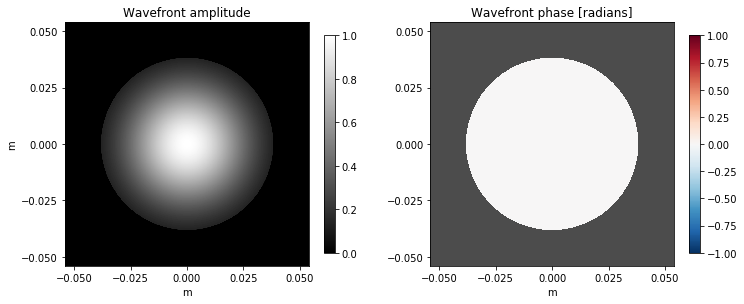

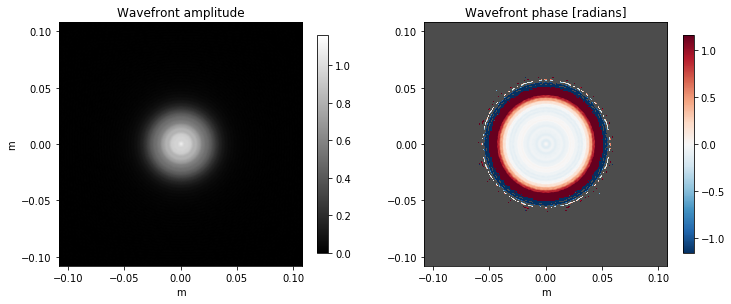

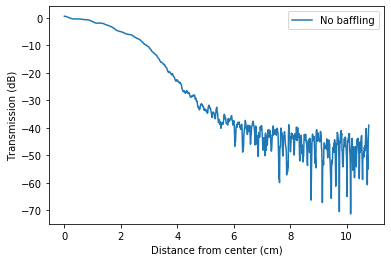

Cold stop radius: 3.81 cm


'\nsum_at_cold_stop_radius=0\nn_coords_at_cold_stop_radius=0\nfor x_ind,x_coord in enumerate(x):\n    for y_ind,y_coord in enumerate(y):\n        if 100*(x_coord**2+y_coord**2) == 100*cold_stop_radius.value**2:\n            sum_at_cold_stop_radius+=z0[x_ind,y_ind]\n            n_coords_at_cold_stop_radius+=1\n\nprint("Average power: %.2f dB" %10*np.log10(sum_at_cold_stop_radius/n_coords_at_cold_stop_radius))\nprint(n_coords_at_cold_stop_radius)\n'

In [9]:
# Start wavefront from lens
#npix = 2048
w_extent = 2

wf0 = poppy.FresnelWavefront(beam_radius=w_extent*beam_width_lens,wavelength=ll)#,npix=npix)
wf0 *= lens_aperture
wf0 *= lens_stop

plt.figure(figsize=(12,5))
wf0.display('both', colorbar=True)

# Propagate to tertiary
wf0.propagate_fresnel(d_lens_3)

plt.figure(figsize=(12,5))
wf0.display('both', colorbar=True)

waist_location_pre_tertiary = wf0.z_w0
waist_pre_tertiary = wf0.w_0
Confocal_distance_pre_tertiary = wf0.z_r
beam_width_lens_0 = wf0.spot_radius(0)
beam_width_tertiary = wf0.spot_radius(d_lens_3)
print("Pre-tertiary:")
print("\tWaist size: %.2f cm" %waist_post_lens.to(u.cm).value)
print("\tWaist location: %.2f cm" %waist_location_post_lens.to(u.cm).value)
print("\tConfocal distance size: %.2f cm" %Confocal_distance_post_lens.to(u.cm).value)
print("\tWidth at lens: %.2f cm" %beam_width_lens_0.to(u.cm).value)
print("\tWidth at tertiary: %.2f cm" %beam_width_tertiary.to(u.cm).value)

y, x = wf0.coordinates()
z0 = wf0.intensity
#print(z0.shape)
array_length = z0.shape[0]
half_array_length = int(z0.shape[0]/2)
"""
a=0 #Toggles zoom
b=z0.shape[0]-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z0[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()
"""
fig2 = plt.figure()
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z0[half_array_length,half_array_length:]),label='No baffling')
plt.xlabel('Distance from center (cm)')
plt.ylabel('Transmission (dB)')
#plt.yscale('log')
plt.legend()
plt.show()

print("Cold stop radius: %.2f cm" %cold_stop_radius.to(u.cm).value)

"""
sum_at_cold_stop_radius=0
n_coords_at_cold_stop_radius=0
for x_ind,x_coord in enumerate(x):
    for y_ind,y_coord in enumerate(y):
        if 100*(x_coord**2+y_coord**2) == 100*cold_stop_radius.value**2:
            sum_at_cold_stop_radius+=z0[x_ind,y_ind]
            n_coords_at_cold_stop_radius+=1

print("Average power: %.2f dB" %10*np.log10(sum_at_cold_stop_radius/n_coords_at_cold_stop_radius))
print(n_coords_at_cold_stop_radius)
"""


## Case 1: Single baffle

Pre-tertiary:
	Waist size: 2.69 cm
	Waist location: 24.00 cm
	Confocal distance size: 380.39 cm
	Width at lens: 5.40 cm
	Width at tertiary: 5.40 cm


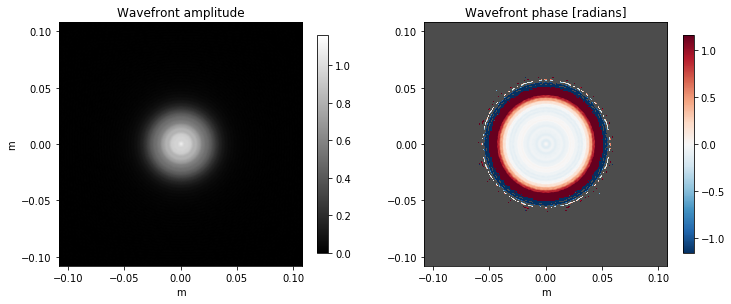

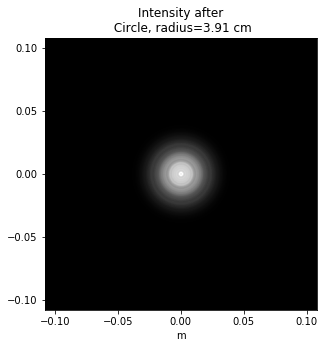

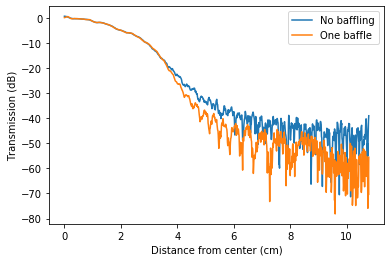

Power lost: 0.59
Cold stop radius: 3.81 cm
Baffle radius: 3.91 cm


In [10]:
# Set baffle stop radius
baffle_overshoot = 0.1*u.cm
baffle_radius = cold_stop_radius+baffle_overshoot
baffle = poppy.CircularAperture(radius=baffle_radius)#.05*u.m)

# Start wavefront from lens
#npix = 2048
wf1 = poppy.FresnelWavefront(beam_radius=w_extent*beam_width_lens,wavelength=ll)#,npix=npix)
wf1 *= lens_aperture
wf1 *= lens_stop

plt.figure(figsize=(12,5))
wf0.display('both', colorbar=True)

f_remaining_1 = 1

# Propagate to tertiary
wf1.propagate_fresnel(18.920*u.cm)
wf1 *= baffle
f_remaining_1 *= (1.-gaussian_truncated_power(baffle_radius.to(u.cm).value,wf1.spot_radius().to(u.cm).value))
wf1.propagate_fresnel(14.140*u.cm)

plt.figure(figsize=(12,5))
wf1.display()#'both', colorbar=True)

waist_location_pre_tertiary_1 = wf1.z_w0-d_lenslet_lens
waist_pre_tertiary_1 = wf1.w_0
Confocal_distance_pre_tertiary_1 = wf1.z_r
beam_width_lens_1 = wf1.spot_radius(0)
beam_width_tertiary_1 = wf1.spot_radius(d_lens_3)
print("Pre-tertiary:")
print("\tWaist size: %.2f cm" %waist_post_lens.to(u.cm).value)
print("\tWaist location: %.2f cm" %waist_location_post_lens.to(u.cm).value)
print("\tConfocal distance size: %.2f cm" %Confocal_distance_post_lens.to(u.cm).value)
print("\tWidth at lens: %.2f cm" %beam_width_lens_1.to(u.cm).value)
print("\tWidth at tertiary: %.2f cm" %beam_width_tertiary_1.to(u.cm).value)

y, x = wf1.coordinates()
z1 = wf1.intensity
#print(z0.shape)
array_length = z0.shape[0]
half_array_length = int(z0.shape[0]/2)
"""
a=0 #Toggles zoom
b=z0.shape[0]-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z0[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()
"""
fig2 = plt.figure()
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z0[half_array_length,half_array_length:]),label='No baffling')
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z1[half_array_length,half_array_length:]),label='One baffle')
plt.xlabel('Distance from center (cm)')
plt.ylabel('Transmission (dB)')
plt.legend()
plt.show()

print("Power lost: %.2f" %(1-f_remaining_1))

print("Cold stop radius: %.2f cm" %cold_stop_radius.to(u.cm).value)
print("Baffle radius: %.2f cm" %baffle_radius.to(u.cm).value)

## Case 2: 5 equally-spaced baffles

Pre-tertiary:
	Waist size: 2.69 cm
	Waist location: 24.00 cm
	Confocal distance size: 380.39 cm
	Width at lens: 5.40 cm
	Width at tertiary: 5.40 cm


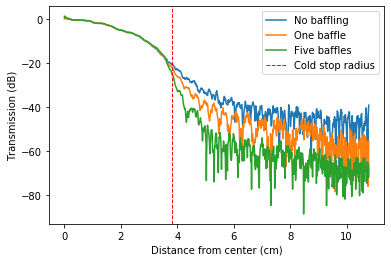

Cold stop radius: 3.81 cm
Baffle radius: 3.91 cm
Loss at cold stop radius, no baffles: -20.62 dB
Loss at cold stop radius, one baffles: -21.99 dB
Loss at cold stop radius, five baffles: -24.65 dB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in log10


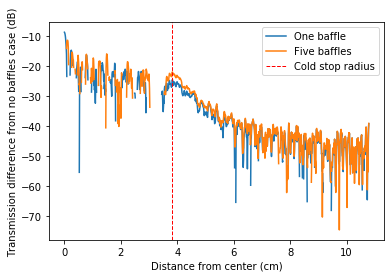

Power lost, 1 baffle: 0.59
Power lost, 5 baffles: 0.99
Cold stop radius: 3.81 cm
Baffle radius: 3.91 cm


In [11]:
# Start wavefront from lens
#npix = 2048
wf5 = poppy.FresnelWavefront(beam_radius=w_extent*beam_width_lens,wavelength=ll)#,npix=npix)
wf5 *= lens_aperture
wf5 *= lens_stop

#plt.figure(figsize=(12,5))
#wf0.display('both', colorbar=True)

# Propagate to first baffle
wf5.propagate_fresnel(18.920*u.cm)

f_remaining_5=1.
# 5 rings 2 cm apart
for dummyvar in np.arange(0,5):
    wf5.propagate_fresnel(2*u.cm)
    wf5 *= baffle
    f_remaining_5 *= (1.-gaussian_truncated_power(baffle_radius.to(u.cm).value,wf5.spot_radius().to(u.cm).value))

wf5.propagate_fresnel(4.140*u.cm)

#plt.figure(figsize=(12,5))
#wf5.display()#'both', colorbar=True)

waist_location_pre_tertiary_1 = wf5.z_w0-d_lenslet_lens
waist_pre_tertiary_1 = wf5.w_0
Confocal_distance_pre_tertiary_1 = wf5.z_r
beam_width_lens_5 = wf5.spot_radius(0)
beam_width_tertiary_5 = wf5.spot_radius(d_lens_3)
print("Pre-tertiary:")
print("\tWaist size: %.2f cm" %waist_post_lens.to(u.cm).value)
print("\tWaist location: %.2f cm" %waist_location_post_lens.to(u.cm).value)
print("\tConfocal distance size: %.2f cm" %Confocal_distance_post_lens.to(u.cm).value)
print("\tWidth at lens: %.2f cm" %beam_width_lens_5.to(u.cm).value)
print("\tWidth at tertiary: %.2f cm" %beam_width_tertiary_5.to(u.cm).value)

y, x = wf5.coordinates()
z5 = wf5.intensity
#print(z0.shape)
array_length = z0.shape[0]
half_array_length = int(z0.shape[0]/2)
"""
a=0 #Toggles zoom
b=z0.shape[0]-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z0[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()
"""

#calculate power lost at cold stop & baffle radii
x_max = x[half_array_length,-1]*100
x_len = len(x[half_array_length,half_array_length:])
ind_cold_stop = int(x_len*cold_stop_radius.to(u.cm).value/x_max) + half_array_length
ind_baffle = int(x_len*baffle_radius.to(u.cm).value/x_max) + half_array_length

P_lost_cold_stop_0 = 10*np.log10(z0[half_array_length,ind_cold_stop])
P_lost_baffle_0 = 10*np.log10(z0[half_array_length,ind_baffle])
P_lost_cold_stop_1 = 10*np.log10(z1[half_array_length,ind_cold_stop])
P_lost_baffle_1 = 10*np.log10(z1[half_array_length,ind_baffle])
P_lost_cold_stop_5 = 10*np.log10(z5[half_array_length,ind_cold_stop])
P_lost_baffle_5 = 10*np.log10(z5[half_array_length,ind_baffle])

fig2 = plt.figure()
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z0[half_array_length,half_array_length:]),label='No baffling')
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z1[half_array_length,half_array_length:]),label='One baffle')
plt.plot(x[half_array_length,half_array_length:]*100,10*np.log10(z5[half_array_length,half_array_length:]),label='Five baffles')
plt.axvline(x=cold_stop_radius.to(u.cm).value,linewidth=1, color='red',linestyle='--',label='Cold stop radius')
plt.xlabel('Distance from center (cm)')
plt.ylabel('Transmission (dB)')
plt.legend()
plt.show()

print("Cold stop radius: %.2f cm" %cold_stop_radius.to(u.cm).value)
print("Baffle radius: %.2f cm" %baffle_radius.to(u.cm).value)
print("Loss at cold stop radius, no baffles: %.2f dB" %P_lost_cold_stop_0)
print("Loss at cold stop radius, one baffles: %.2f dB" %P_lost_cold_stop_1)
print("Loss at cold stop radius, five baffles: %.2f dB" %P_lost_cold_stop_5)

fig2 = plt.figure()
plt.plot(x[half_array_length,half_array_length:]*100,
         10*np.log10(z0[half_array_length,half_array_length:]-z1[half_array_length,half_array_length:]),
         label='One baffle')
plt.plot(x[half_array_length,half_array_length:]*100,
         10*np.log10(z0[half_array_length,half_array_length:]-z5[half_array_length,half_array_length:]),
         label='Five baffles')
plt.axvline(x=cold_stop_radius.to(u.cm).value,linewidth=1, color='red',linestyle='--',label='Cold stop radius')
plt.xlabel('Distance from center (cm)')
plt.ylabel('Transmission difference from no baffles case (dB)')
plt.legend()
plt.show()

print("Power lost, 1 baffle: %.2f" %(1-f_remaining_1))
print("Power lost, 5 baffles: %.2f" %(1-f_remaining_5))

print("Cold stop radius: %.2f cm" %cold_stop_radius.to(u.cm).value)
print("Baffle radius: %.2f cm" %baffle_radius.to(u.cm).value)